# Feature Engineering

In [396]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1

# Loading the dataset

In [400]:
df = sns.load_dataset('titanic')

# Titanic Dataset Analysis

The human brain is always optimal, as it can comprehend complex contexts beyond mere numbers. However, machines can learn patterns from numerical data. In this analysis, we are focusing on the Titanic dataset with the goal of predicting whether a passenger survived the disaster.

## Target and Features

The target label in our dataset is `survived`. Let’s examine the features (also known as labels) in the dataset:

1. **Survived**: This is our target variable.
2. **Alive**: This feature is perfectly aligned with the target variable, making it an excellent feature for prediction.
3. **Pclass**: This feature indicates the class of the passenger (1st, 2nd, or 3rd). While not the best, it can provide useful information.
4. **SibSp**: Number of siblings/spouses aboard. This feature has limited predictive power.
5. **Parch**: Number of parents/children aboard. Similar to SibSp, it is not a key feature.
6. **Who**: Defines whether the passenger is male, female, or child. It’s not the best feature but still provides some insights.
7. **Adult_male**: Indicates if the passenger is an adult male. Not a primary feature.
8. **Embark_town**: The town where the passenger embarked. Not a crucial feature.
9. **Alone**: Indicates if the passenger was alone. Not a significant feature.

## Potentially Good Features

1. **Sex**: This could be a significant feature as there might have been a bias in rescuing passengers based on gender.
2. **Fare**: The fare paid by the passenger can indicate their socioeconomic status, which might have influenced their chances of survival.
3. **Embarked**: Combined with class, this feature can be important as the priority during the incident was likely given to wealthy passengers in higher classes.
4. **Deck**: This feature is crucial because the deck location influenced survival rates. When the ship was damaged and water began filling, certain decks were closed off, trapping passengers and crew.

By understanding the incident, we can identify good features through feature engineering, enhancing the predictive power of our model.


In [402]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Finding the null_values in the dataset
To get the "correlation" of the features, our data should be clean so that the "correlation" will not be affected.
- Here we get the list of columns, which have null_values

In [404]:
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
null_values

['age', 'embarked', 'deck', 'embark_town']

- Now let's remove the null_values, We should not remove the null_values, rather we should replace the null_values with the mean if the label is in numerical and with the most occuring value if the label is categorical.
- See the null_values are replaced by ".mode()" which will take the most occuring value inn the dataset

In [406]:
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Correlation Between Features and Target

To find the correlation between features and the target variable in the Titanic dataset, we can use the `corr()` function. However, we encounter the following error:
This error occurs because `corr()` requires numerical input, and our dataset contains categorical data represented as strings. Therefore, we need to transform these categorical data points into numerical data points. This process is part of feature extraction.

### Discretization

Discretization involves taking a set of data values and logically grouping them into bins (or buckets). This transformation converts continuous or categorical data into discrete numerical values.

### Steps for Discretization

1. **Identify Categorical Features**: Determine which features in the dataset are categorical (e.g., `Sex`, `Embarked`).

2. **Transform Categorical Data**: Convert these categorical features into numerical values using techniques like:
    - **Label Encoding**: Assign a unique integer to each category.
    - **One-Hot Encoding**: Create binary columns for each category.

3. **Apply Correlation Function**: Once the categorical data is transformed, use the `corr()` function to find the correlation between features and the target variable.

By following these steps, we can successfully compute the correlation and identify which features are most relevant to predicting whether a passenger survived.




In [408]:
df.corr()

ValueError: could not convert string to float: 'male'

- We got an error, because the "corr()" excepts the numerical feature values, but our data also containn the catogericol values, let's find the categorical values in the dataset so that our "corr()" can work properly.

- See we have some featurs in categorical type.

In [ ]:
df.info()

# finding the the categorical columnns

In [409]:
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
categorical_columnns

['sex', 'embarked', 'who', 'embark_town', 'alive']

# Error Resolved

We resolved the error by converting the `Sex` feature from categorical to numerical values, where `male` is turned into 1 and `female` into 0. This transformation resolved the initial error. However, `Sex` was not the only categorical label in our dataset. Other categorical features will also cause similar errors if not converted.

## Transforming All Categorical Labels

To avoid errors and ensure accurate correlation calculations, we need to convert all categorical labels into numerical values. Here are the steps to achieve this:

1. **Identify Categorical Features**: List all the categorical features in the dataset (e.g., `Embarked`, `Deck`, `Pclass`, etc.).

By converting all categorical labels into numerical values, we can use the `corr()` function without encountering errors, allowing us to analyze the correlations between features and the target variable accurately.


In [411]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["embarked"] = df["embarked"].map({"S": 1, "C": 2, "Q": 3})
df["class"] = df["class"].map({'Third' : 1, 'First':2, 'Second':3})
df["who"] = df["who"].map({'man':1, 'woman':2, 'child':3})
df["adult_male"] = df["adult_male"].map({True:1, False:2})
df["deck"] = df["deck"].map({'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7})
df["embark_town"] = df["embark_town"].map({'Southampton':1, 'Cherbourg':2, 'Queenstown':3})
df["alive"] = df["alive"].map({'yes':1, 'no':2})
df["alone"] = df["alone"].map({True:1, False:2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1


# Applying the `corr()` After Resolving the Error

We have successfully transformed our categorical features into numerical values, ensuring that the `corr()` function will work without errors. Now, let's apply the `corr()` function to our dataset and interpret the results to identify the best features for our target variable. This process is a part of feature engineering.

## Steps to Apply `corr()` and Interpret Results

1. **Apply the `corr()` Function**: Use the `corr()` function on the dataset to calculate the correlation matrix.

2. **Analyze the Correlation Matrix**: Look for features with high correlation values with the target variable. Positive values indicate a direct relationship, while negative values indicate an inverse relationship.

3. **Identify the Best Features**: Features with higher absolute correlation values (either positive or negative) with the target variable are considered the best features. These features are more likely to have a significant impact on predicting the target variable.

By interpreting the `corr()` results, we can identify the most relevant features and proceed with feature engineering to improve our preditive model.


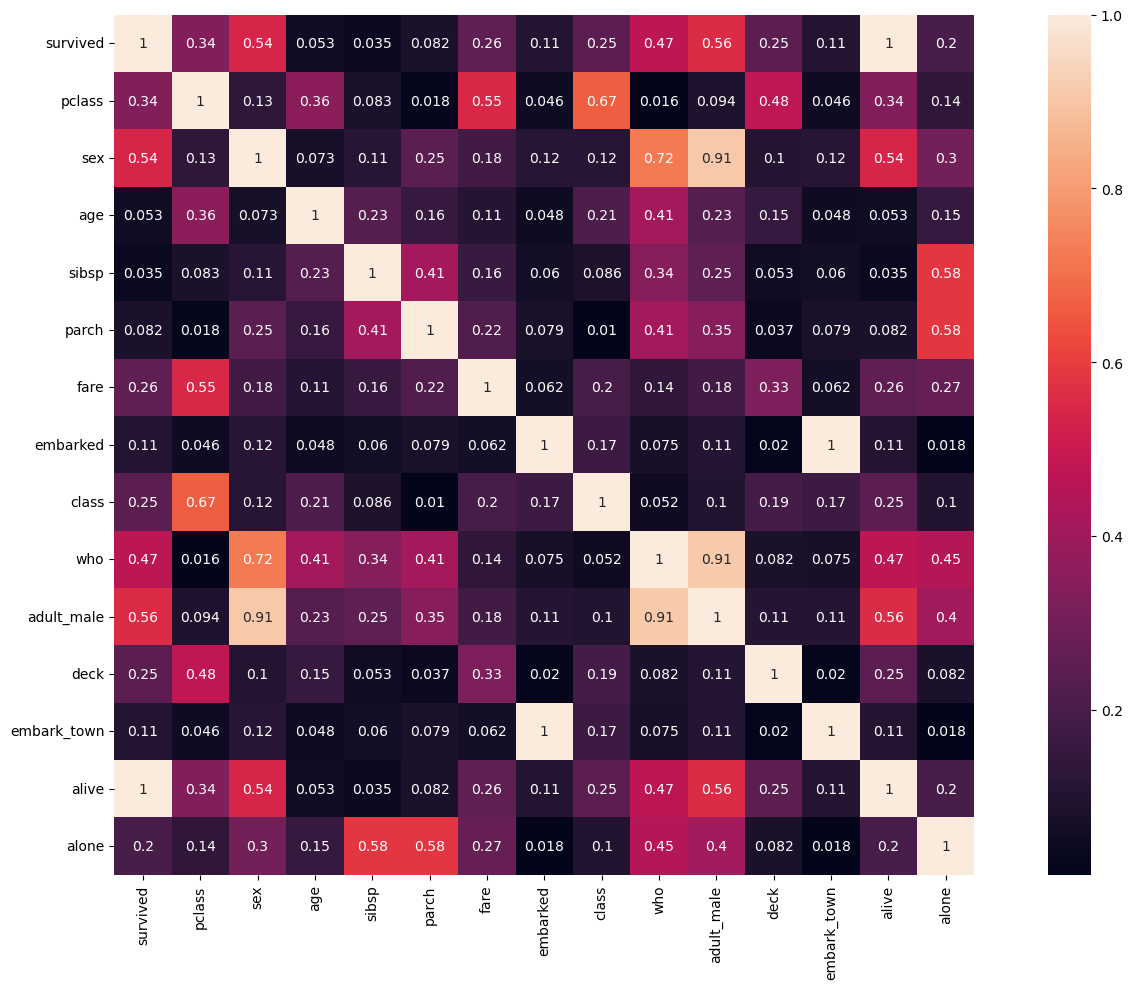

In [413]:
corr = df.corr().abs()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, square = True)
plt.tight_layout()
plt.show()

# Selection of features
- now we've done the "corr()", let's just select the feature which is of high correlation with each other. 
- it'll help our model to do prediction more effeicently
- let's set that we're looking for the features whose correlation with the target is more that 0.2, it's our threshold. we set it.
- so our features are reduced, but these are the best features that are participating to the target values. other features are not that necessary thry might just increasing our computation power

In [445]:
# target = "survi
feature_selection = [cols for cols in corr.columns if cols != "survived" and abs(corr[cols]["survived"] >= 0.5)]
print(f" Best Features with correlation more than 0.3: {feature_selection}\n")
df[feature_selection].head()

 Best Features with correlation more than 0.3: ['sex', 'adult_male', 'alive']



,sex,adult_male,alive
0,1,1,2
1,0,2,1
2,0,2,1
3,0,2,1
4,1,1,2


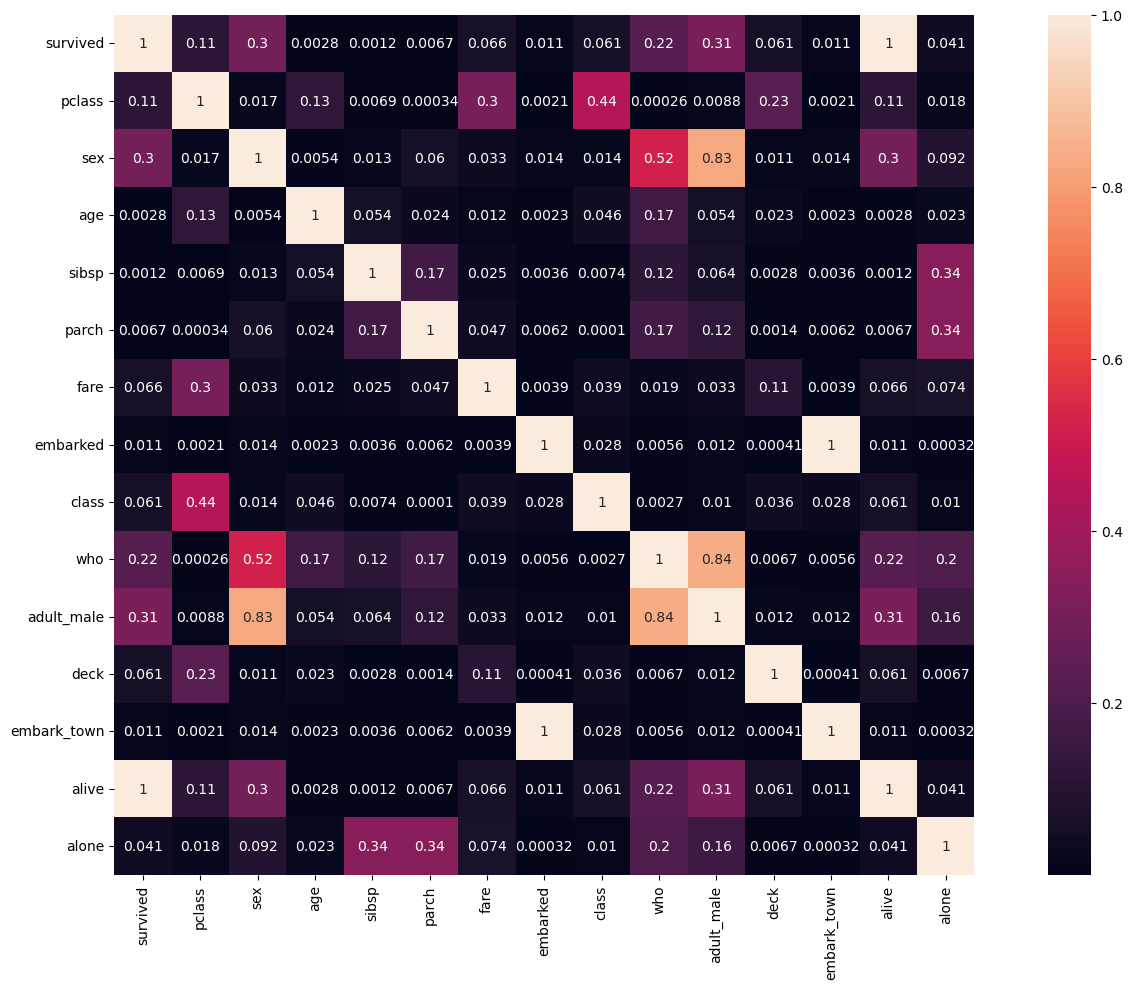

In [449]:
corr_r2 = corr**2
plt.figure(figsize = (15,10))
sns.heatmap(corr_r2, annot=True, square = True)
plt.tight_layout()
plt.show()

In [457]:
feature_selection = [cols for cols in corr_r2.columns if cols != "survived" and abs(corr_r2[cols]["survived"] >= 0.1)]
print(f" Best Features with correlation more than 0.3: {feature_selection}\n")
df[feature_selection].head()

 Best Features with correlation more than 0.3: ['pclass', 'sex', 'who', 'adult_male', 'alive']



,pclass,sex,who,adult_male,alive
0,3,1,1,1,2
1,1,0,2,2,1
2,3,0,2,2,1
3,1,0,2,2,1
4,3,1,1,1,2
